# Decision Tree

In [63]:
# import the necessary modules

import pandas
from sklearn import tree
import pydotplus
from sklearn.tree import DecisionTreeClassifier
%matplotlib notebook
import matplotlib.pyplot as plt
import matplotlib.image as pltimg
import graphviz
%matplotlib inline

In [78]:
# read dataframe

df = pandas.read_csv('Dataset_Personalidad.csv')
print(df)

   Edad  Genero  apertura  neuroticismo  conciencia  amabilidad  extraversion  \
0    23  Female         7             8           5           4             7   
1    26    Male         6             6           8           5             8   
2    27  Female         4             6           7           7             5   
3    27  Female         6             7           8           6             8   
4    25    Male         8             4           5           8             5   
5    19    Male         5             4           8           5             8   
6    24  Female         7             6           6           5             5   
7    17  Female         4             7           6           7             4   

  Personalidad  
0  dependiente  
1        serio  
2        serio  
3        serio  
4  responsable  
5  responsable  
6  responsable  
7  dependiente  


In [80]:
# change string values into numerical

d1 = {'Male': 1, 'Female': 0}
df['Genero'] = df['Genero'].map(d1)

d5 = {'dependiente': 0, 'serio': 1, 'responsable': 2}
df['Personalidad'] = df['Personalidad'].map(d5)

print(df)

   Edad  Genero  apertura  neuroticismo  conciencia  amabilidad  extraversion  \
0    23       0         7             8           5           4             7   
1    26       1         6             6           8           5             8   
2    27       0         4             6           7           7             5   
3    27       0         6             7           8           6             8   
4    25       1         8             4           5           8             5   
5    19       1         5             4           8           5             8   
6    24       0         7             6           6           5             5   
7    17       0         4             7           6           7             4   

   Personalidad  
0             0  
1             1  
2             1  
3             1  
4             2  
5             2  
6             2  
7             0  


In [84]:
# choose features, i.e., columns from which we try to predict
features = ['apertura', 'neuroticismo', 'conciencia', 'amabilidad', 'extraversion']
X = df[features]

# choose target, i.e., the column with the values we try to predict
y = df['Personalidad']

print(X, y, sep='\n\n')

   apertura  neuroticismo  conciencia  amabilidad  extraversion
0         7             8           5           4             7
1         6             6           8           5             8
2         4             6           7           7             5
3         6             7           8           6             8
4         8             4           5           8             5
5         5             4           8           5             8
6         7             6           6           5             5
7         4             7           6           7             4

0    0
1    1
2    1
3    1
4    2
5    2
6    2
7    0
Name: Personalidad, dtype: int64


In [85]:
# create a decision tree

dtree = DecisionTreeClassifier()
dtree = dtree.fit(X, y)

In [86]:
# save decision tree as an image
data = tree.export_graphviz(dtree, out_file=None, feature_names=features)
graph = pydotplus.graph_from_dot_data(data)
graph.write_png('mydecisiontree.png')

True

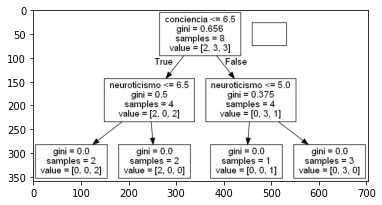

In [87]:
# show the image
img = pltimg.imread('mydecisiontree.png')
imgplot = plt.imshow(img)
plt.show()
